Exercise 1 : Basic Scatter Plot With Plotnine

Tasks:

Create a pandas DataFrame with two columns, x and y, each containing 20 random numbers.
Use Plotnine to create a scatter plot of y versus x.
Add x and y-axis labels as ‘X-Value’ and ‘Y-Value’, respectively. Also, add a plot title ‘Basic Scatter Plot’.
Expected Outcome: A scatter plot displaying the relationship between the data in x and y, with appropriate labels and title. 

In [15]:
import pandas as pd
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd 

data = {'x':[rd.randint(1,100) for _ in range(20)],
'y':[rd.randint(1,100) for _ in range(20)]}

df = pd.DataFrame(data)



In [16]:
df

,x,y
0,14,46
1,92,41
2,11,10
3,42,28
4,10,89
5,21,89
6,99,91
7,64,44
8,86,75
9,67,20


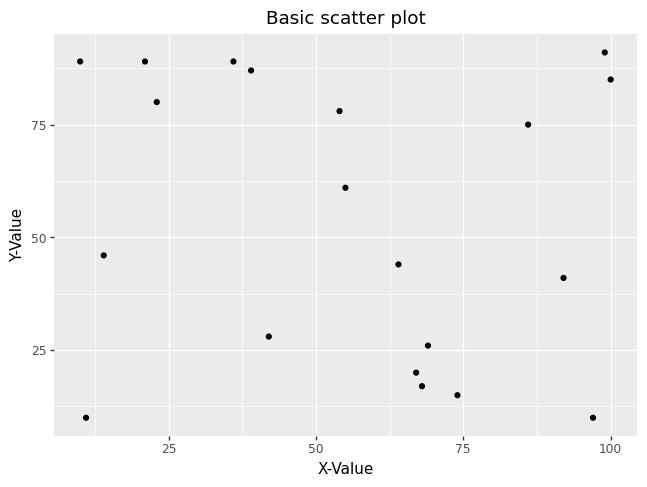

In [22]:
scatter_plot = (ggplot(df, aes(x='x', y='y')) + 
 geom_point() + 
#  geom_smooth(method='lm')+
ggtitle(title='Basic scatter plot')+
xlab('X-Value')+
ylab('Y-Value'))

scatter_plot.draw()

Exercise 2 : Bar Plot Of Categorical Data With Plotnine

In [46]:
categories = ['A', 'B', 'C']

category_column = rd.choices(categories, k=30)
df = pd.DataFrame({'category': category_column})
df

,category
0,B
1,C
2,B
3,A
4,A
5,A
6,B
7,A
8,B
9,B


In [53]:
data_bar = df['category'].value_counts().reset_index()
data_bar

,category,count
0,B,13
1,A,10
2,C,7


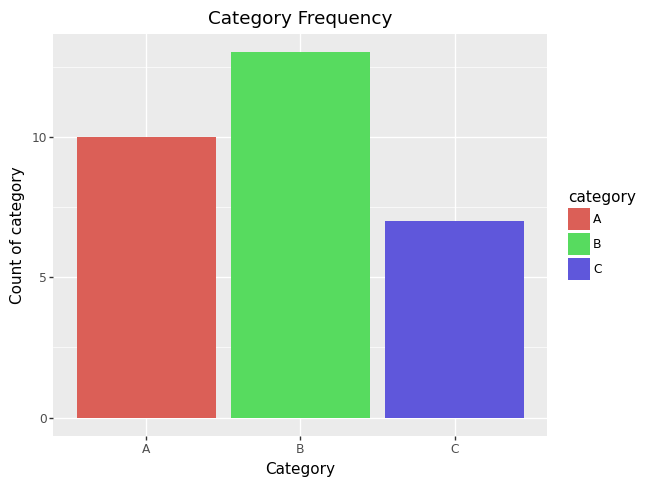

In [54]:
bar_plot = (
    ggplot(data_bar, aes(x='category', y='count', fill='category')) + 
    geom_bar(stat='identity') + 
    labs(title='Category Frequency')+
    ylab('Count of category')+
    xlab('Category')
)

bar_plot.draw()

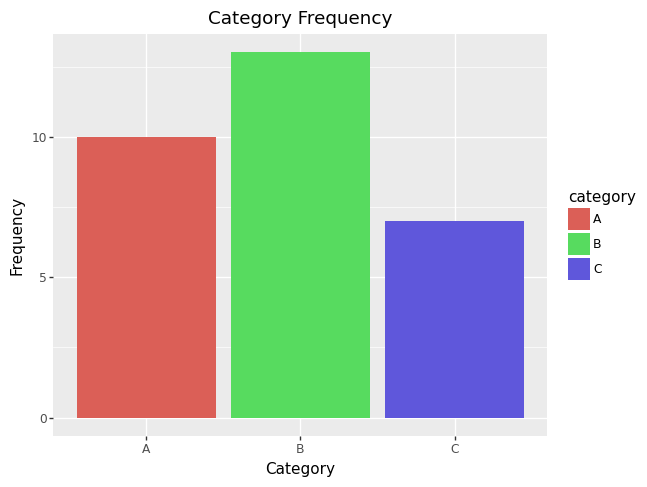

In [51]:
bar_plot = (
    ggplot(df, aes(x='category')) +
    aes(fill='category')+
    geom_bar() + 
    labs(title='Category Frequency', x='Category', y='Frequency')  # Set title and axis labels
)


bar_plot.draw()

Exercise 3 : Line Plot With Multiple Lines With Plotnine

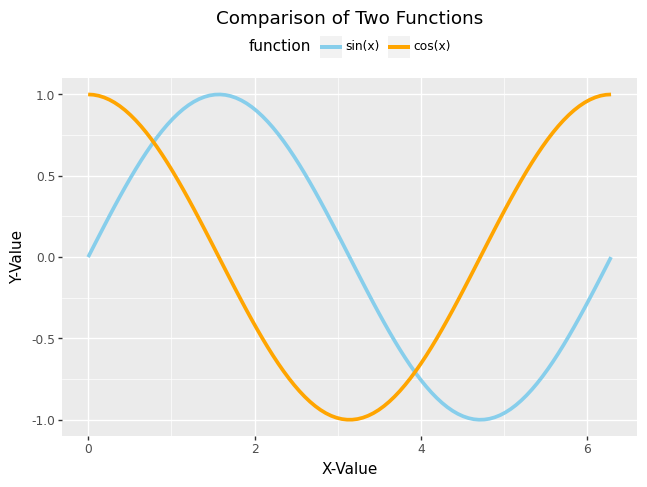

In [62]:
import numpy as np

x = np.linspace(0, 2*np.pi, 100)

y1 = np.sin(x)
y2 = np.cos(x)

# Create a pandas DataFrame with the x-values and corresponding y-values
df = pd.DataFrame({'x': x, 'y1': y1, 'y2': y2})

# Create a line plot using Plotnine
line_plot = (
    ggplot(pd.melt(df, id_vars='x', var_name='function'), aes(x='x', y='value', color='function')) +
    geom_line(size=1.5, linetype='solid') +  # Plot lines
    labs(title='Comparison of Two Functions', x='X-Value', y='Y-Value') +  # Set title and axis labels
    scale_color_manual(values=['skyblue', 'orange'], labels=['sin(x)', 'cos(x)']) +  # Set colors and labels for legend
    theme(legend_position='top')  
)
line_plot.draw()

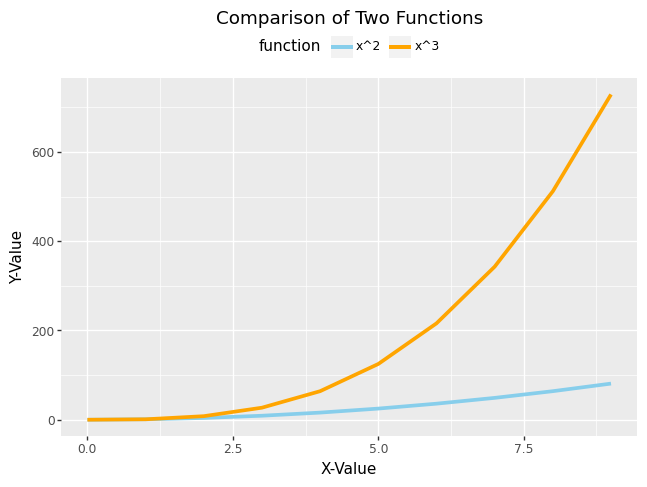

In [71]:
import numpy as np

x = [x for x in range(0,10)]

y1 = [x**2 for x in x]
y2 = [x**3 for x in x]

# Create a pandas DataFrame with the x-values and corresponding y-values
df = pd.DataFrame({'x': x, 'y1': y1, 'y2': y2})

# Create a line plot using Plotnine
line_plot = (
    ggplot(pd.melt(df, id_vars='x', var_name='function'), aes(x='x', y='value', color='function')) +
    geom_line(size=1.5, linetype='solid') +  # Plot lines
    labs(title='Comparison of Two Functions', x='X-Value', y='Y-Value') +  # Set title and axis labels
    scale_color_manual(values=['skyblue', 'orange'], labels=['x^2', 'x^3']) +  # Set colors and labels for legend
    theme(legend_position='top')  
)
line_plot.draw()

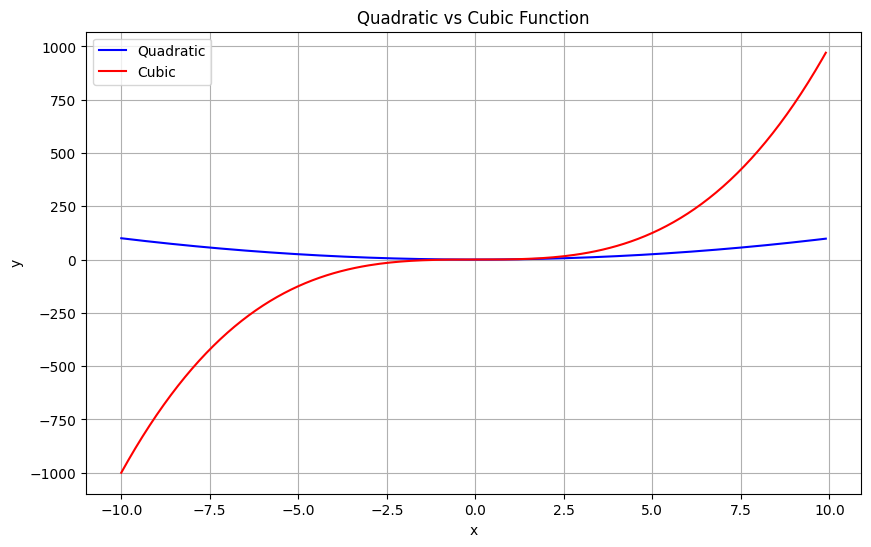

In [72]:

x = np.arange(-10, 10, 0.1)
y_quad = x**2
y_cubic = x**3

plt.figure(figsize=(10, 6))
plt.plot(x, y_quad, label='Quadratic', color='blue') 
plt.plot(x, y_cubic, label='Cubic', color='red')      
plt.legend() 
plt.title('Quadratic vs Cubic Function')             
plt.xlabel('x')                                       
plt.ylabel('y')                                  
plt.grid(True)                                  
plt.show()                                           


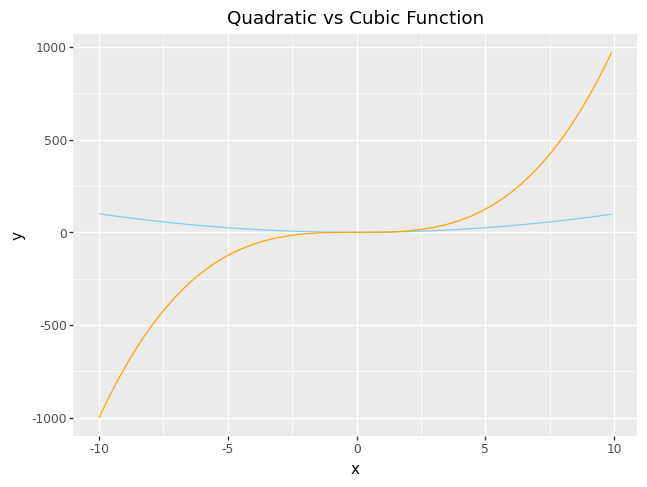

In [81]:
x = np.arange(-10, 10, 0.1)
y_quad = [x_val**2 for x_val in x]
y_cubic = [x_val**3 for x_val in x]

# Создание DataFrame из данных
df = pd.DataFrame({'x': x, 'y_quad': y_quad, 'y_cubic': y_cubic})

# Создание графика с использованием Plotnine
line_plot = (
    ggplot(df,aes(x='x', y='value', color='function')) + 
    aes(x='x') + 
    geom_line(aes(y='y_quad'), color='skyblue') +
    geom_line(aes(y='y_cubic'), color='orange') +  
    scale_color_manual(values=['skyblue', 'orange'], labels=['x^2', 'x^3']) + 
    theme(legend_position='top') + 
    labs(title='Quadratic vs Cubic Function', x='x', y='y')
)

line_plot.draw()

Exercise 4 : Basic Line Chart With Plotly

In [87]:
import plotly.graph_objects as go



In [84]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sales = [200, 210, 250, 300, 320, 340, 360, 380, 390, 400, 420, 440]

df = pd.DataFrame({'months':months,'sales':sales})

In [88]:
df

,months,sales
0,Jan,200
1,Feb,210
2,Mar,250
3,Apr,300
4,May,320
5,Jun,340
6,Jul,360
7,Aug,380
8,Sep,390
9,Oct,400


In [90]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=months, y=sales, mode='lines', name='Sales'))

fig.update_layout(title='Monthly Sales Data',
                  xaxis_title='Months',
                  yaxis_title='Sales')
fig.show()

Exercise 5 : Bar Chart With Customization With Plotly

In [95]:
genres = ['Fiction', 'Non-Fiction', 'Sci-Fi', 'Mystery', 'Biography']
books_sold = [120, 150, 90, 80, 130]

df = pd.DataFrame({'Genres':genres,'Books_sold':books_sold})

In [96]:
df

,Genres,Books_sold
0,Fiction,120
1,Non-Fiction,150
2,Sci-Fi,90
3,Mystery,80
4,Biography,130


In [100]:
genres = ['Fiction', 'Non-Fiction', 'Sci-Fi', 'Mystery', 'Biography']
books_sold = [120, 150, 90, 80, 130]


fig = go.Figure(go.Bar(
    x=genres,
    y=books_sold,
    marker_color=['blue', 'green', 'red', 'purple', 'orange']  # Customize bar colors
))

fig.update_layout(
    title='Books Sold by Genre',
    xaxis_title='Genres',
    yaxis_title='Number of Books Sold'
)

fig.show()

In [101]:
import plotly.express as px

# Data
data = pd.DataFrame({
    'Age': [25, 30, 35, 40, 45],
    'Salary': [50000, 60000, 70000, 80000, 90000],
    'Years of Experience': [2, 5, 7, 10, 12]
})

# Create a scatter plot
fig = px.scatter(data, x='Age', y='Salary', size='Years of Experience', title='Relationship between Age, Salary, and Experience')

# Display the plot
fig.show()